# Figure. Rare Variants

In [1]:
import copy
import os
import subprocess

import cdpybio as cpb
from cycler import cycler
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

import ciepy
import cardipspy as cpy

%matplotlib inline
%load_ext rpy2.ipython

dy_name = 'figure_rare_variants'
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

In [2]:
sns.set_style('whitegrid')

In [3]:
fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'all_rare_variants_info.tsv')
rare_info = pd.read_table(fn, index_col=0)
fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'all_not_rare_variants_info.tsv.gz')
not_rare_info = pd.read_table(fn, index_col=0)

fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'rare_del.tsv')
rare_del = pd.read_table(fn, index_col=0)
fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'not_rare_del.tsv')
not_rare_del = pd.read_table(fn, index_col=0)

fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'rare_dup.tsv')
rare_dup = pd.read_table(fn, index_col=0)
fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'not_rare_dup.tsv')
not_rare_dup = pd.read_table(fn, index_col=0)

In [4]:
m = np.floor(rare_info.exp.min())
pdfs = pd.DataFrame(index=np.arange(m, abs(m) + 0.1, 0.1))
density = scipy.stats.gaussian_kde(rare_info.exp)
pdfs['rare'] = density(pdfs.index)
density = scipy.stats.gaussian_kde(not_rare_info.exp)
pdfs['not_rare'] = density(pdfs.index)
density = scipy.stats.gaussian_kde(rare_info[rare_info.cadd >= 20].exp)
pdfs['rare_cadd_f'] = density(pdfs.index)
density = scipy.stats.gaussian_kde(rare_info[rare_info.phylop >= 3].exp)
pdfs['rare_cons_f'] = density(pdfs.index)

In [5]:
r = rare_dup
nr = not_rare_dup
m = -6
dup_pdfs = pd.DataFrame(index=np.arange(m, abs(m) + 0.1, 0.1))
density = scipy.stats.gaussian_kde(r.exp)
dup_pdfs['rare'] = density(dup_pdfs.index)
density = scipy.stats.gaussian_kde(nr.exp)
dup_pdfs['not_rare'] = density(dup_pdfs.index)
r = rare_dup[rare_dup.overlaps_exon]
density = scipy.stats.gaussian_kde(r.exp)
dup_pdfs['rare_overlaps_exon'] = density(dup_pdfs.index)

In [6]:
r = rare_del
nr = not_rare_del
m = -6
del_pdfs = pd.DataFrame(index=np.arange(m, abs(m) + 0.1, 0.1))
density = scipy.stats.gaussian_kde(r.exp)
del_pdfs['rare'] = density(del_pdfs.index)
density = scipy.stats.gaussian_kde(nr.exp)
del_pdfs['not_rare'] = density(del_pdfs.index)
r = rare_del[rare_del.overlaps_exon]
density = scipy.stats.gaussian_kde(r.exp)
del_pdfs['rare_overlaps_exon'] = density(del_pdfs.index)

## Paper

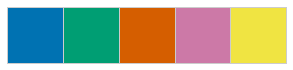

In [7]:
sns.palplot(sns.color_palette('colorblind', 5))

In [8]:
plt.rc('axes', prop_cycle=(cycler('color', sns.color_palette('colorblind', 5))))

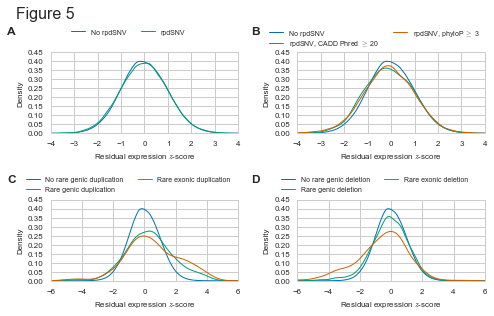

In [13]:
lw = 1

fig = plt.figure(figsize=(6.85, 4.5), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 1, 'Figure 5',
        size=16, va='top')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.90, 0.5, 1])

# Rare promoter DHS SNVs.
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
pdfs.not_rare.plot(label='No rpdSNV', ax=ax, linewidth=lw)
pdfs.rare.plot(label='rpdSNV', ax=ax, linewidth=lw)
# pdfs.rare_cadd_f.plot(label='rpdSNV, CADD Phred $\\geq$ 20', ax=ax, linewidth=lw)
# pdfs.rare_cons_f.plot(label='rpdSNV, phyloP $\\geq$ 3', ax=ax, linewidth=lw)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.45)
ax.set_ylabel('Density', fontsize=8)
ax.set_xlabel('Residual expression $z$-score', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
gs.tight_layout(fig, rect=[0, 0.455, 0.5, 0.87])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
pdfs.not_rare.plot(label='No rpdSNV', ax=ax, linewidth=lw)
pdfs.rare.plot(label='rpdSNV', ax=ax, linewidth=1)
# pdfs.rare_cadd_f.plot(label='rpdSNV, CADD Phred $\\geq$ 20', ax=ax, linewidth=lw)
# pdfs.rare_cons_f.plot(label='rpdSNV, phyloP $\\geq$ 3', ax=ax, linewidth=lw)
ax.set_xlim(100, 200)
ciepy.clean_axis(ax)
ax.legend(fontsize=7, ncol=2, loc='upper center')
gs.tight_layout(fig, rect=[0, 0.85, 0.5, 0.95])

# Rare promoter DHS SNVs with filters.
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
pdfs.not_rare.plot(label='No rpdSNV', ax=ax, linewidth=lw)
pdfs.rare_cadd_f.plot(label='rpdSNV, CADD Phred $\\geq$ 20', ax=ax, linewidth=lw)
pdfs.rare_cons_f.plot(label='rpdSNV, phyloP $\\geq$ 3', ax=ax, linewidth=lw)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.45)
ax.set_ylabel('Density', fontsize=8)
ax.set_xlabel('Residual expression $z$-score', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
gs.tight_layout(fig, rect=[0.5, 0.455, 1, 0.87])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
pdfs.not_rare.plot(label='No rpdSNV', ax=ax, linewidth=lw)
pdfs.rare_cadd_f.plot(label='rpdSNV, CADD Phred $\\geq$ 20', ax=ax, linewidth=lw)
pdfs.rare_cons_f.plot(label='rpdSNV, phyloP $\\geq$ 3', ax=ax, linewidth=lw)
ax.set_xlim(100, 200)
ciepy.clean_axis(ax)
ax.legend(fontsize=7, ncol=2, loc='upper center')
gs.tight_layout(fig, rect=[0.5, 0.85, 1, 0.95])

# Rare dups
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
dup_pdfs.not_rare.plot(label='No rare genic duplication', ax=ax, linewidth=lw)
dup_pdfs.rare.plot(label='Rare genic duplication', ax=ax, linewidth=lw)
dup_pdfs.rare_overlaps_exon.plot(label='Rare exonic duplication', ax=ax, linewidth=lw)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 0.45)
ax.set_ylabel('Density', fontsize=8)
ax.set_xlabel('Residual expression $z$-score', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
gs.tight_layout(fig, rect=[0, 0, 0.5, 0.415])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
dup_pdfs.not_rare.plot(label='No rare genic duplication', ax=ax, linewidth=lw)
dup_pdfs.rare.plot(label='Rare genic duplication', ax=ax, linewidth=lw)
dup_pdfs.rare_overlaps_exon.plot(label='Rare exonic duplication', ax=ax, linewidth=lw)
ax.set_xlim(100, 200)
ciepy.clean_axis(ax)
ax.legend(fontsize=7, ncol=2, loc='upper center')
gs.tight_layout(fig, rect=[0, 0.395, 0.5, 0.495])

# Rare dels
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
del_pdfs.not_rare.plot(label='No rare deletion', ax=ax, linewidth=lw)
del_pdfs.rare.plot(label='Rare deletion', ax=ax, linewidth=lw)
del_pdfs.rare_overlaps_exon.plot(label='Rare exonic deletion', ax=ax, linewidth=lw)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 0.45)
ax.set_ylabel('Density', fontsize=8)
ax.set_xlabel('Residual expression $z$-score', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
gs.tight_layout(fig, rect=[0.5, 0, 1, 0.415])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
del_pdfs.not_rare.plot(label='No rare genic deletion', ax=ax, linewidth=lw)
del_pdfs.rare.plot(label='Rare genic deletion', ax=ax, linewidth=lw)
del_pdfs.rare_overlaps_exon.plot(label='Rare exonic deletion', ax=ax, linewidth=lw)
ax.set_xlim(100, 200)
ciepy.clean_axis(ax)
ax.legend(fontsize=7, ncol=2, loc='upper center')
gs.tight_layout(fig, rect=[0.5, 0.395, 1, 0.495])


t = fig.text(0.005, 0.88, 'A', weight='bold', 
             size=12)
t = fig.text(0.5, 0.88, 'B', weight='bold', 
             size=12)
t = fig.text(0.005, 0.425, 'C', weight='bold', 
             size=12)
t = fig.text(0.5, 0.425, 'D', weight='bold', 
             size=12)

plt.savefig(os.path.join(outdir, 'rare_variants.pdf'))
plt.savefig(os.path.join(outdir, 'rare_variants.png'), dpi=300);

In [10]:
3 +

SyntaxError: invalid syntax (<ipython-input-10-0a1363fec7b0>, line 1)

## Presentation

In [ ]:
fig = plt.figure(figsize=(8, 4), dpi=300)

# Rare promoter DHS SNVs.
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

pdfs.rare.plot(label='Rare pDHS\nSNV', ax=ax, linewidth=0.8, color=cpb.analysis.tableau20[0])
pdfs.not_rare.plot(label='No rare\npDHS SNV', ax=ax, linewidth=0.8, color=cpb.analysis.tableau20[6])
ax.legend(fontsize=10, frameon=True, fancybox=True)
ax.set_xlim(-4, 4)
ax.set_ylabel('Density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
(pdfs.rare - pdfs.not_rare).plot(ax=ax)
ax.set_ylabel('$\Delta$ (rare - no rare) density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0.5, 0, 1, 1])

plt.savefig(os.path.join(outdir, 'rare_promoter_dhs_snvs_presentation.pdf'));

In [ ]:
fig = plt.figure(figsize=(8, 4), dpi=300)

fs = 10

# Rare dups
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
dup_pdfs.not_rare.plot(label='No rare genic duplication', ax=ax, linewidth=lw, 
                       color=cpb.analysis.tableau20[0])
dup_pdfs.rare.plot(label='Rare genic duplication', ax=ax, linewidth=lw, 
                   color=cpb.analysis.tableau20[6])
dup_pdfs.rare_overlaps_exon.plot(label='Rare exonic duplication', ax=ax, linewidth=lw, 
                                 color=cpb.analysis.tableau20[2])
ax.set_xlim(-6, 6)
ax.set_ylabel('Density', fontsize=fs)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
ax.set_title('Rare duplications')
gs.tight_layout(fig, rect=[0, 0.1, 0.5, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
dup_pdfs.not_rare.plot(label='No rare genic duplication', ax=ax, linewidth=lw,
                       color=cpb.analysis.tableau20[0])
dup_pdfs.rare.plot(label='Rare genic duplication', ax=ax, linewidth=lw, 
                   color=cpb.analysis.tableau20[6])
dup_pdfs.rare_overlaps_exon.plot(label='Rare exonic duplication', ax=ax, linewidth=lw, 
                                 color=cpb.analysis.tableau20[2])
ax.set_xlim(100, 200)
ciepy.clean_axis(ax)
lgd_a = ax.legend(fontsize=10, ncol=2, loc='upper center')
gs.tight_layout(fig, rect=[0, 0, 0.5, 0.1])

# Rare dels
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
del_pdfs.not_rare.plot(label='No rare deletion', ax=ax, linewidth=lw, 
                       color=cpb.analysis.tableau20[0])
del_pdfs.rare.plot(label='Rare deletion', ax=ax, linewidth=lw, 
                   color=cpb.analysis.tableau20[6])
del_pdfs.rare_overlaps_exon.plot(label='Rare exonic deletion', ax=ax, linewidth=lw, 
                                 color=cpb.analysis.tableau20[2])
ax.set_xlim(-6, 6)
ax.set_ylabel('Density', fontsize=fs)
ax.set_xlabel('Residual expression $z$-score', fontsize=fs)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
ax.set_title('Rare deletions')
gs.tight_layout(fig, rect=[0.5, 0.1, 1, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
del_pdfs.not_rare.plot(label='No rare genic deletion', ax=ax, linewidth=lw, 
                       color=cpb.analysis.tableau20[0])
del_pdfs.rare.plot(label='Rare genic deletion', ax=ax, linewidth=lw, 
                   color=cpb.analysis.tableau20[6])
del_pdfs.rare_overlaps_exon.plot(label='Rare exonic deletion', ax=ax, linewidth=lw, 
                                 color=cpb.analysis.tableau20[2])
ax.set_xlim(100, 200)
ciepy.clean_axis(ax)
lgd_b = ax.legend(fontsize=10, ncol=2, loc='upper center')
gs.tight_layout(fig, rect=[0.5, 0, 1, 0.1])
fig.savefig(os.path.join(outdir, 'rare_genic_cnvs_presentation.pdf'), bbox_extra_artists=(lgd_a, lgd_b), 
            bbox_inches='tight');

In [ ]:
fig = plt.figure(figsize=(8, 4), dpi=300)

# Rare promoter DHS SNVs.
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

del_pdfs.rare.plot(label='Rare\neDEL', ax=ax, color=cpb.analysis.tableau20[0])
del_pdfs.not_rare.plot(label='No rare\neDEL', ax=ax, color=cpb.analysis.tableau20[6])
ax.legend(fontsize=10, frameon=True, fancybox=True)
ax.set_xlim(-6, 6)
ax.set_title('Exonic Deletions')
ax.set_ylabel('Density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0.5, 0, 1, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
dup_pdfs.rare.plot(label='Rare\ngDUP', ax=ax, color=cpb.analysis.tableau20[0])
dup_pdfs.not_rare.plot(label='No rare\ngDUP', ax=ax, color=cpb.analysis.tableau20[6])
ax.legend(fontsize=10, frameon=True, fancybox=True)
ax.set_xlim(-6, 6)
ax.set_title('Genic Duplications')
ax.set_ylabel('Density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0, 0, 0.5, 1])

plt.savefig(os.path.join(outdir, 'rare_genic_cnvs_presentation.pdf'));